In [376]:
# Imports
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)

from sklearn.naive_bayes import GaussianNB

In [377]:
# Importing Data

FINAL_DATA_PATH = '/mnt/e/HOME/AI/model_stock_predictions/data/processed/processed_final_data.csv'
FINAL_DATA_PATH_PICKLE = '/mnt/e/HOME/AI/model_stock_predictions/data/processed/processed_final_data.pickle'

FINAL_CORRELATION_PATH = '/mnt/e/HOME/AI/model_stock_predictions/data/processed/processed_final_correlation.csv'
FINAL_CORRELATION_PATH_PICKLE = '/mnt/e/HOME/AI/model_stock_predictions/data/processed/processed_final_correlation.pickle'

In [378]:
data_frame = open(FINAL_DATA_PATH_PICKLE, "rb")
data_frame = pickle.load(data_frame)

data_correlation = open(FINAL_CORRELATION_PATH_PICKLE, "rb")
data_correlation = pickle.load(data_correlation)

In [379]:
data_frame

,Date,Symbol,Open,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,Timestamp
0,2010-01-04,20MICRONS,46.00,47.55,47.38,36282,1.719201e+11,0.0,22411.0,1.262543e+09
1,2010-01-05,20MICRONS,46.10,46.80,47.47,40478,1.921480e+11,0.0,25787.0,1.262630e+09
2,2010-01-06,20MICRONS,47.50,46.40,46.94,49991,2.346578e+11,0.0,31161.0,1.262716e+09
3,2010-01-07,20MICRONS,47.55,46.40,46.22,9252,4.276240e+10,0.0,6665.0,1.262803e+09
4,2010-01-08,20MICRONS,47.50,48.95,49.50,215985,1.069103e+12,0.0,80503.0,1.262889e+09
...,...,...,...,...,...,...,...,...,...,...
3494667,2021-08-30,ZYDUSWELL,2317.40,2297.80,2308.64,30953,7.145934e+12,4300.0,16920.0,1.630262e+09
3494668,2021-08-31,ZYDUSWELL,2297.80,2313.80,2306.83,51771,1.194268e+13,4264.0,34404.0,1.630348e+09
3494669,2021-09-01,ZYDUSWELL,2308.00,2325.80,2346.97,113427,2.662093e+13,10307.0,54220.0,1.630435e+09
3494670,2021-09-02,ZYDUSWELL,2340.00,2319.40,2335.93,21696,5.068025e+12,3156.0,10299.0,1.630521e+09


In [8]:
data_frame.columns

Index(['Date', 'Symbol', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades',
       'Deliverable Volume', 'Timestamp'],
      dtype='object')

In [637]:
data_correlation

,Symbol,CostCorrelation,Average,Current,RateOfChange,RateOfChangePercentage,MaxChange,MaxChangePercentage,TradeCorrelation
1,20MICRONS,-0.311965,44.861638,53.60,1.102566e-17,-0.055414,22.4,16.8,0.038049
2,21STCENMGM,-0.655980,18.716525,35.50,-4.734605e+01,-368.147995,5.1,14.4,0.197694
3,3MINDIA,0.940447,11397.358451,24537.05,1.135250e+04,99.219558,30402.1,99.9,0.536517
4,PDUMJEIND,-0.629847,15.165960,14.00,-3.629645e+01,-297.326078,-6.4,-26.7,0.253165
5,3PLAND,-0.176193,9.126020,17.00,-4.326735e+01,-533.817857,-23.7,-159.1,0.379183
...,...,...,...,...,...,...,...,...,...
1997,ZOTA,0.235477,172.159528,378.20,1.236106e+02,70.615717,324.3,84.2,0.338348
1998,ZUARI,-0.051293,209.815788,148.90,1.624605e+02,69.154226,615.9,95.2,0.181113
1999,ZUARIAGRO,-0.720368,546.841150,144.35,4.885568e+02,81.714307,828.8,94.6,0.427757
2000,ZUARIGLOB,0.027482,98.389352,164.75,5.106526e+01,42.238665,279.4,88.3,0.096089


# Linear Regression Model

In [109]:
linear_regression = linear_model.LinearRegression()

In [380]:
lr_independent_variable_name = [
    'Open',
    'Turnover', 
    'Timestamp'
]

lr_dependent_variable_name = [
    'Close'
]

In [614]:
lr_temp_frame = data_frame[data_frame['Symbol'] == '3PLAND']

In [615]:
lr_train_frame = lr_temp_frame.sample(frac=0.99)
lr_test_frame = lr_temp_frame.drop(lr_train_frame.index)

lr_train_independent_data = lr_train_frame[lr_independent_variable_name]
lr_train_dependent_data = lr_train_frame[lr_dependent_variable_name]

lr_test_independent_data = lr_test_frame[lr_independent_variable_name]
lr_test_dependent_data = lr_test_frame[lr_dependent_variable_name]

In [616]:
linear_regression.fit(lr_train_independent_data, lr_train_dependent_data)

LinearRegression()

In [617]:
linear_regression.coef_

array([[ 9.64650466e-01, -1.01029926e-09]])

In [618]:
lr_pred = linear_regression.predict(lr_test_independent_data)

In [619]:
print('Mean squared error: %.2f' % mean_squared_error(lr_test_dependent_data, lr_pred))
print('Coefficient of determination: %.2f' % r2_score(lr_test_dependent_data, lr_pred))

Mean squared error: 0.41
Coefficient of determination: 0.97


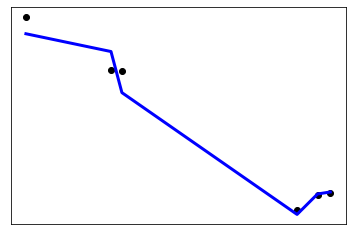

In [620]:
# Plot outputs
plt.scatter(lr_test_independent_data['Timestamp'], lr_test_dependent_data,  color='black')
plt.plot(lr_test_independent_data['Timestamp'], lr_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Polynomial Regression

In [621]:
lr_independent_variable_name = [
    'Open',
#     'Turnover', 
    'Timestamp'
]

lr_dependent_variable_name = [
#     'Turnover', 
    'Close'
]

In [623]:
lr_temp_frame = data_frame[data_frame['Symbol'] == '3PLAND']

In [624]:
lr_train_frame = lr_temp_frame.sample(frac=0.99)
lr_test_frame = lr_temp_frame.drop(lr_train_frame.index)

lr_train_independent_data = lr_train_frame[lr_independent_variable_name]
lr_train_dependent_data = lr_train_frame[lr_dependent_variable_name]

lr_test_independent_data = lr_test_frame[lr_independent_variable_name]
lr_test_dependent_data = lr_test_frame[lr_dependent_variable_name]

In [625]:
polynomial_regression = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=2)), 
        ('linear', linear_model.LinearRegression(fit_intercept=False))
    ]
)

In [626]:
polynomial_regression.fit(lr_train_independent_data, lr_train_dependent_data)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [627]:
polynomial_regression.named_steps['linear'].coef_

array([[ 1.12554727e-17,  6.19347990e-15,  8.88807997e-09,
         5.02692280e-16,  6.10167862e-10, -5.51311066e-18]])

In [628]:
plr_test_independent_data = polynomial_regression.named_steps['poly'].fit_transform(lr_test_independent_data)

plr_pred = polynomial_regression.named_steps['linear'].predict(plr_test_independent_data)

In [629]:
print('Mean squared error: %.2f' % mean_squared_error(lr_test_dependent_data, plr_pred))
print('Coefficient of determination: %.2f' % r2_score(lr_test_dependent_data, plr_pred))

Mean squared error: 0.11
Coefficient of determination: 0.97


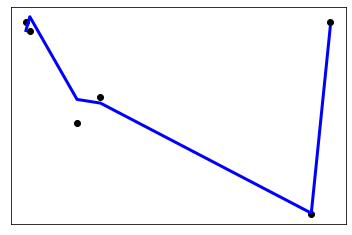

In [630]:
plt.scatter(lr_test_independent_data['Timestamp'], lr_test_dependent_data,  color='black')
plt.plot(lr_test_independent_data['Timestamp'], plr_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Regression Pipeline

In [631]:
import datetime

duration = [
        datetime.datetime.strptime(
            datetime.datetime.strftime(
                datetime.datetime.now().date() + datetime.timedelta(days=idx),
                "%Y-%m-%d"
            ),
            "%Y-%m-%d"
        ).timestamp() for idx in range(10)
    ]

duration

[1631471400.0,
 1631557800.0,
 1631644200.0,
 1631730600.0,
 1631817000.0,
 1631903400.0,
 1631989800.0,
 1632076200.0,
 1632162600.0,
 1632249000.0]

In [690]:
linear_regression = linear_model.LinearRegression()
linear_regression_turnover = linear_model.LinearRegression()

lr_independent_variable_name = [
    'Open',
    'Timestamp',
#     'Turnover', 
]

lr_dependent_variable_name = [
    'Close'
]

lrt_independent_variable_name = [
    'Timestamp'
]

lrt_dependent_variable_name = [
    'Turnover'
]

lr_temp_frame = data_frame[data_frame['Symbol'] == 'AAKASH']

lr_train_frame = lr_temp_frame.sample(frac=.99)
lr_test_frame = lr_temp_frame.drop(lr_train_frame.index)

########## Regression Close Start

lr_train_independent_data = lr_train_frame[lr_independent_variable_name]
lr_train_dependent_data = lr_train_frame[lr_dependent_variable_name]

lr_test_independent_data = lr_test_frame[lr_independent_variable_name]
lr_test_dependent_data = lr_test_frame[lr_dependent_variable_name]

linear_regression.fit(lr_train_independent_data, lr_train_dependent_data)

lr_pred = linear_regression.predict(lr_test_independent_data)

print('Mean squared error: %.2f' % mean_squared_error(lr_test_dependent_data, lr_pred))
print('Coefficient of determination: %.2f' % r2_score(lr_test_dependent_data, lr_pred))

########## Regression Close End

########## Polynimial Regression Start

lr_train_independent_data = lr_train_frame[lr_independent_variable_name]
lr_train_dependent_data = lr_train_frame[lr_dependent_variable_name]

lr_test_independent_data = lr_test_frame[lr_independent_variable_name]
lr_test_dependent_data = lr_test_frame[lr_dependent_variable_name]


polynomial_regression = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=2)), 
        ('linear', linear_model.LinearRegression(fit_intercept=True))
    ]
)

polynomial_regression.fit(lr_train_independent_data, lr_train_dependent_data)

plr_test_independent_data = polynomial_regression.named_steps['poly'].fit_transform(lr_test_independent_data)

plr_pred = polynomial_regression.named_steps['linear'].predict(plr_test_independent_data)

print('Mean squared error: %.2f' % mean_squared_error(lr_test_dependent_data, plr_pred))
print('Coefficient of determination: %.2f' % r2_score(lr_test_dependent_data, plr_pred))

########## Polynimial Regression End

########## Regression Turnover Start

lrt_train_independent_data = lr_train_frame[lrt_independent_variable_name]
lrt_train_dependent_data = lr_train_frame[lrt_dependent_variable_name]

lrt_test_independent_data = lr_test_frame[lrt_independent_variable_name]
lrt_test_dependent_data = lr_test_frame[lrt_dependent_variable_name]

linear_regression_turnover.fit(lrt_train_independent_data, lrt_train_dependent_data)

lrt_pred = linear_regression_turnover.predict(lrt_test_independent_data)

print('Mean squared error: %.2f' % mean_squared_error(lrt_test_dependent_data, lrt_pred))
print('Coefficient of determination: %.2f' % r2_score(lrt_test_dependent_data, lrt_pred))

########## Regression Turnover End

# plt.scatter(lrt_train_independent_data['Timestamp'], lrt_train_dependent_data,  color='black')
# plt.plot(lr_test_independent_data['Timestamp'], plr_pred, color='blue', linewidth=3)

# plt.xticks()
# plt.yticks()

# plt.show()

# print(lr_train_independent_data['Timestamp'])

Mean squared error: 0.22
Coefficient of determination: 1.00
Mean squared error: 2.10
Coefficient of determination: 1.00
Mean squared error: 2386500775122432816054272.00
Coefficient of determination: 0.41


In [691]:
duration = [
        datetime.datetime.strptime(
            datetime.datetime.strftime(
                datetime.datetime.now().date() + datetime.timedelta(days=idx),
                "%Y-%m-%d"
            ),
            "%Y-%m-%d"
        ).timestamp() for idx in range(365)
    ]

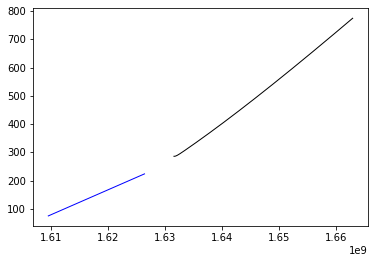

In [692]:
last_open = lr_temp_frame['Close'].to_list()[-1]
last_turnover = lr_temp_frame['Turnover'].to_list()[-1]

stock_price = []
stock_time = []

for index, timestamp in enumerate(duration):
#     predicted_stock = linear_regression.predict(
#         pd.DataFrame(
#             { 
#                 'Open': [last_open], 
#                 'Timestamp': [timestamp]
#             }
#         )
#     )

    pred_attr = polynomial_regression.named_steps['poly'].fit_transform(pd.DataFrame(
            { 
                'Open': [last_open], 
                'Timestamp': [timestamp]
            }
        ))
        
    predicted_stock = polynomial_regression.named_steps['linear'].predict(pred_attr)
    
    last_open = predicted_stock[0][0]
    
    stock_time.append(timestamp)
    stock_price.append(last_open)
    
plt.plot(
    lr_test_independent_data['Timestamp'], 
    lr_pred, 
    color='blue', 
    linewidth=1
)

plt.plot(
    stock_time, 
    [[x]for x in stock_price], 
    color='black', 
    linewidth=1
)

plt.xticks()
plt.yticks()

plt.show()

In [694]:
data_correlation['Symbol'].to_list()

['20MICRONS',
 '21STCENMGM',
 '3MINDIA',
 'PDUMJEIND',
 '3PLAND',
 '5PAISA',
 'FINANTECH',
 '63MOONS',
 'A2ZMES',
 'A2ZINFRA',
 'AAKASH',
 'AAREYDRUGS',
 'AARON',
 'AARTIDRUGS',
 'AARTIIND',
 'AARTISURF',
 'AARVEEDEN',
 'AARVI',
 'AAVAS',
 'ABAN',
 'ABB',
 'ABBOTINDIA',
 'ABCAPITAL',
 'PFRL',
 'ABFRL',
 'ABSLBANETF',
 'ABSLNN50ET',
 'ACC',
 'KALECONSUL',
 'ACCELYA',
 'ACCURACY',
 'ACE',
 'ACRYSIL',
 'ADANIENT',
 'ADANIGREEN',
 'MUNDRAPORT',
 'ADANIPORTS',
 'ADANIPOWER',
 'ADANITRANS',
 'ADFFOODS',
 'ADORWELD',
 'SPHEREGSL',
 'ADROITINFO',
 'ADSL',
 'ADVANIHOTR',
 'ADVENZYMES',
 'AEGISCHEM',
 'AFFLE',
 'AGARIND',
 'AVAYAGCL',
 'AGCNET',
 'AGRITECH',
 'AGROPHOS',
 'AHLADA',
 'AHLEAST',
 'AHLUCONT',
 'AHLWEST',
 'AIAENG',
 'AIRAN',
 'AJANTPHARM',
 'AJMERA',
 'AJOONI',
 'GAMMNINFRA',
 'AKASH',
 'AKG',
 'AKSHARCHEM',
 'AKSHOPTFBR',
 'ICI',
 'AKZOINDIA',
 'ALANKIT',
 'ALBERTDAVD',
 'ALEMBICLTD',
 'ENKEI',
 'ALICON',
 'ALKALI',
 'ALKEM',
 'ALKYLAMINE',
 'ALLCARGO',
 'ALLSEC',
 'ALMONDZ',
 'AL